In [44]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import re
import seaborn as sns
from lifetimes.plotting import *
from lifetimes.utils import *
pd.set_option('display.max_columns', None)

In [16]:
df1=pd.read_csv('olist_customers_dataset.csv')
df2=pd.read_csv('olist_order_payments_dataset.csv')
df3=pd.read_csv('olist_orders_dataset.csv')

# column name in 3 dataframe

In [17]:
df1.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [18]:
df2.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [19]:
df3.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

# inner join on 3 dataframe to make one data frame

In [20]:
df4= pd.merge(df2, df3, on='order_id', how='inner')

In [21]:
df= pd.merge(df1, df4, on='customer_id', how='inner')

In [22]:
df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,credit_card,2,146.87,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1,credit_card,8,335.48,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1,credit_card,7,157.73,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1,credit_card,1,173.30,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1,credit_card,8,252.25,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [23]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [24]:
uni=df['customer_unique_id'].unique()
len(uni)

96095

# let us drop columns that are not required.
# we need only customer id, date and payemnt.

In [25]:
df.drop(['customer_zip_code_prefix','customer_id','customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'order_status', 'order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],axis=1,inplace=True)

In [26]:
df

,customer_unique_id,payment_installments,payment_value,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,2,146.87,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,8,335.48,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,7,157.73,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,1,173.30,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,8,252.25,2018-07-29 09:51:30
...,...,...,...,...
103881,1a29b476fee25c95fbafc67c5ac95cf8,6,88.78,2018-04-07 15:48:17
103882,d52a67c98be1cf6a5c84435bd38d095d,3,129.06,2018-04-04 08:20:22
103883,e9f50caf99f032f0bf3c55141f019d99,5,56.04,2018-04-08 20:11:50
103884,73c2643a0a458b49f58cea58833b192e,2,711.07,2017-11-03 21:08:33


# converting time stamp to date 

In [27]:
df['date'] = pd.to_datetime(df.order_purchase_timestamp).dt.strftime('%d/%m/%Y')

In [29]:
df.drop(['order_purchase_timestamp'],axis=1,inplace=True)

In [32]:
df

,customer_unique_id,payment_installments,payment_value,date
0,861eff4711a542e4b93843c6dd7febb0,2,146.87,16/05/2017
1,290c77bc529b7ac935b93aa66c333dc3,8,335.48,12/01/2018
2,060e732b5b29e8181a18229c7b0b2b5e,7,157.73,19/05/2018
3,259dac757896d24d7702b9acbbff3f3c,1,173.30,13/03/2018
4,345ecd01c38d18a9036ed96c73b8d066,8,252.25,29/07/2018
...,...,...,...,...
103881,1a29b476fee25c95fbafc67c5ac95cf8,6,88.78,07/04/2018
103882,d52a67c98be1cf6a5c84435bd38d095d,3,129.06,04/04/2018
103883,e9f50caf99f032f0bf3c55141f019d99,5,56.04,08/04/2018
103884,73c2643a0a458b49f58cea58833b192e,2,711.07,03/11/2017


# check for missing value

In [43]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
if nan.empty:
    print('there are no missing value')
else:
    print('the missing column name,total missing value, missing value percentage, and column type is seen above')
nan

there are no missing value


,Total,Percent,type
nan col,,,


# Check the Last order date

In [46]:
last_order_date = df['date'].max()
print(last_order_date)

31/12/2017


# Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase)  into summary data (a frequency, recency, age and monetary).
# Frequency represents the number of repeat purchases the customer has made
# t=This is equal to the duration between a customer’s first purchase and the end of the period under study
# Recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. 

In [53]:
lf_tx_data = summary_data_from_transaction_data(df, 'customer_unique_id', 'date', monetary_value_col='payment_value', observation_period_end='2017-12-31')

lf_tx_data.reset_index()
lf_tx_data.sort_values('recency',ascending =False)

,frequency,recency,T,monetary_value
customer_unique_id,,,,
32ea3bdedab835c3aa6cb68ce66565ef,1.0,566.0,661.0,56.78
0b3dc7efaafb0cf78a4796d42fa8d74c,1.0,474.0,630.0,356.13
4962136f755981b83b03f476e66eea7d,1.0,427.0,477.0,163.53
8329519e31cb1b89bd44c3c6ae417ad6,1.0,389.0,477.0,111.30
2dc7f51f05ba1b1a92608e45e55d1fe1,1.0,352.0,362.0,67.43
...,...,...,...,...
558cb7d841f132be98d632d22e6bde5f,0.0,0.0,45.0,0.00
558d25e550c5a1300c5775a26df16158,0.0,0.0,184.0,0.00
558e83cbe6bde610b528833d16ba588e,0.0,0.0,166.0,0.00


# Create histogram to find out how many customers purchased item only once.

count    44033.000000
mean         0.018736
std          0.153504
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 98.29 %


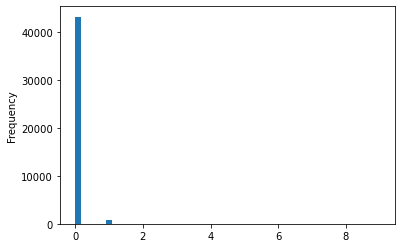

In [56]:
lf_tx_data['frequency'].plot(kind='hist', bins=50)
print(lf_tx_data['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(lf_tx_data['frequency'] == 0)/float(len(lf_tx_data))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

# Frequency/Recency Analysis Using the BG/NBD Model

In [82]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T'])
print(bgf)


<lifetimes.BetaGeoFitter: fitted with 44033 subjects, a: 0.18, alpha: 407.53, b: 0.11, r: 0.06>


In [59]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.056038,0.012413,0.031708,0.080369
alpha,407.534512,108.642531,194.595152,620.473872
a,0.184489,0.351486,-0.504423,0.873402
b,0.107071,0.192302,-0.269840,0.483983


# Visualizing our frequency/recency matrix

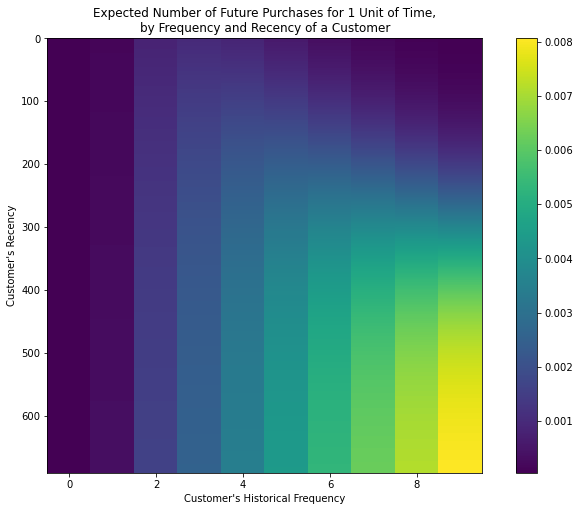

In [60]:

%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

# predict if the customers are  alive

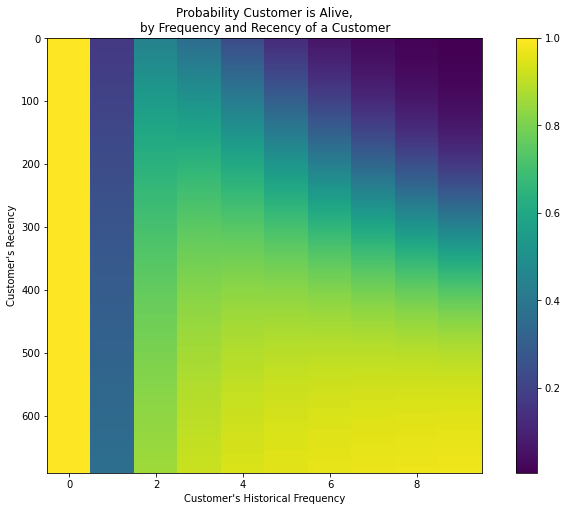

In [61]:


from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

# Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases in the next 10 days, based on historical data


In [63]:
t = 10
lf_tx_data['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T']),2)
lf_tx_data.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,customer_unique_id,frequency,recency,T,monetary_value,pred_num_txn
0,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,198.0,237.0,46.850000,0.13
1,1b6c7548a2a1f9037c1fd3ddfed95f33,4.0,252.0,263.0,135.820000,0.06
2,dc813062e0fc23409cd255f7f53c7074,4.0,322.0,358.0,158.987500,0.05
3,47c1a3033b8b77b3ab6e109eb4d5fdf3,3.0,142.0,176.0,252.853333,0.05
4,fc719c11b4dce594f47e1f9aa739a3a2,2.0,40.0,45.0,101.480000,0.04
5,63cfc61cee11cbe306bff5857d00bfe4,3.0,168.0,224.0,157.273333,0.04
6,b8b3c435a58aebd788a477bed8342910,3.0,155.0,240.0,299.380000,0.04
7,ec7f1811826ab04a27a92197bc40c888,3.0,311.0,323.0,85.833333,0.04
8,a7657330b1c135f3acd420326e335b2c,3.0,179.0,295.0,197.926667,0.04
9,f0e310a6839dce9de1638e0fe5ab282a,3.0,219.0,298.0,130.856667,0.04


# Assessing model fit

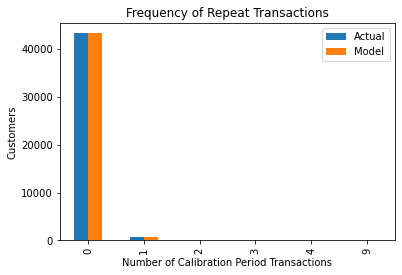

In [64]:

from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)


# Customer's future transaction prediction for next 10 days

In [75]:
t = 30
individual = lf_tx_data.loc['8d50f5eadf50201ccdcedfb9e2ac8455']
p1=bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])
print('Our model predicts that customer 8d50f5eadf50201ccdcedfb9e2ac8455s future transaction is appx 0 in 10 days')
p1

Our model predicts that customer 8d50f5eadf50201ccdcedfb9e2ac8455s future transaction is appx 0 in 10 days


0.40343700027976215

In [76]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
lf_tx_data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.586758
frequency,0.586758,1.000000


# Shortlist customers who had at least one repeat purchase with the company. 


In [78]:
shortlisted_customers = lf_tx_data[lf_tx_data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

                 customer_unique_id  frequency  recency      T  \
0  013f4353d26bb05dc6652f1269458d8d        1.0      4.0   37.0   
1  015557c9912277312b9073947804a7ba        1.0     77.0  360.0   
2  018b5a7502c30eb5f230f1b4eb23a156        1.0     94.0  227.0   
3  01c289bb06354cdc7e6549570f20ada4        1.0    295.0  300.0   
4  02168ea18740a0fdaaa15f11bebba5db        1.0     21.0  133.0   

   monetary_value  pred_num_txn  
0          164.04          0.01  
1          242.22          0.00  
2           55.09          0.01  
3          168.36          0.01  
4          132.02          0.01  
-----------------------------------------
The Number of Returning Customers are:  754


# Train gamma-gamma model by taking into account the monetary_value.


In [79]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 754 subjects, p: 9.52, q: 2.32, v: 21.94>


# After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 


In [80]:
print(ggf.conditional_expected_average_profit(
        lf_tx_data['frequency'],
        lf_tx_data['monetary_value']
    ).head(10))

customer_unique_id
0000f46a3911fa3c0805444483337064    158.599723
0000f6ccb0745a6a4b88665a16c9f078    158.599723
0004aac84e0df4da2b147fca70cf8255    158.599723
0005e1862207bf6ccc02e4228effd9a0    158.599723
0006fdc98a402fceb4eb0ee528f6a8d4    158.599723
00082cbe03e478190aadbea78542e933    158.599723
000a5ad9c4601d2bbdd9ed765d5213b3    158.599723
000bfa1d2f1a41876493be685390d6d3    158.599723
000c8bdb58a29e7115cfc257230fb21b    158.599723
000de6019bb59f34c099a907c151d855    158.599723
dtype: float64


In [81]:

lf_tx_data['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        lf_tx_data['frequency'],
        lf_tx_data['monetary_value']), 2)
lf_tx_data.reset_index().head()

,customer_unique_id,frequency,recency,T,monetary_value,pred_num_txn,pred_txn_value
0,0000f46a3911fa3c0805444483337064,0.0,0.0,89.0,0.0,0.0,158.6
1,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,21.0,0.0,0.0,158.6
2,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,47.0,0.0,0.0,158.6
3,0005e1862207bf6ccc02e4228effd9a0,0.0,0.0,272.0,0.0,0.0,158.6
4,0006fdc98a402fceb4eb0ee528f6a8d4,0.0,0.0,166.0,0.0,0.0,158.6


# Calculate Customer Lifetime Value


In [84]:
lf_tx_data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    lf_tx_data['frequency'],
    lf_tx_data['recency'],
    lf_tx_data['T'],
    lf_tx_data['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)

lf_tx_data.drop(lf_tx_data.iloc[:, 0:6], inplace=True, axis=1)

lf_tx_data.sort_values(by='CLV', ascending=False).head(10).reset_index()

,customer_unique_id,CLV
0,86df00dc5fd68f4dd5d5945ca19f3ed6,697.25
1,a1044dd75b74fbc485b040575a14acf0,404.68
2,b8b3c435a58aebd788a477bed8342910,391.16
3,47c1a3033b8b77b3ab6e109eb4d5fdf3,376.26
4,3db6e5afa8e8178a29afc729855315e2,330.13
5,21bde4e982c4681021edabb899bcebfe,300.75
6,055ec572ac7f3c7bdd04a183830ebe59,290.18
7,6419a1be8feac26ec793667b71cbaeb4,270.78
8,e30b83af13d6ff0b0f427b2a67c43b39,268.58
9,dc813062e0fc23409cd255f7f53c7074,254.16
